## <span style="color:blue">Problem statment

A role of a job-agency, which receives thousands of resumes every month, but does not have time to classify these.
Resumes come in, but we don't know exactly how these should be assigned. Is this applicant an engineer, HR or warehouse worker?
You are expected to help in reading the resumes and provide a revision for all of them about the position, experience, skills, courses …. In a data frame and then doing some analysis.


## <span style="color:blue">Data Description

Context
    
A collection of Resume Examples taken from livecareer.com for categorizing a given resume into any of the labels defined in the dataset.
    
Content
    
Contains 2400+ Resumes in string as well as PDF format.
PDF stored in the data folder differentiated into their respective labels as folders with each resume residing inside the folder in pdf form with filename as the id defined in the csv.
Inside the CSV:

- ID: Unique identifier and file name for the respective pdf.

- Resume_str : Contains the resume text only in string format.

- Resume_str : Contains the resume text only in string format.

- Category : Category of the job the resume was used to apply.

    Present categories are
HR, Designer, Information-Technology, Teacher, Advocate, Business-Development, Healthcare, Fitness, Agriculture, BPO, Sales, Consultant, Digital-Media, Automobile, Chef, Finance, Apparel, Engineering, Accountant, Construction, Public-Relations, Banking, Arts, Aviation


### <span style="color:orange">Task 1

Create a descriptive csv file from the plain-text samples with the followoing columns:

- POSITION_TITLE: Job title.
- resume number: the Id of resume that it was saved as
- QUALIFICATIONS: The qualifications that each applicant had for the job
- EDUCATION _TYPE: type of education that the applicant had (master, bachelor, diploma….)
- SCHOOL_TYPE: The type of school the applicant study in (university, college, high school)
- EDUCATION_MAJOR: The education major you study in this school.
- EXPERIENCE_LENGTH: The number of experience years needed to apply for this job.
- AWORDS: If the applicant had an award or not.
- COMMUNITY SERVICE: If the applicant had a community service work or not.
- VOLUNTEERING: If the applicant had any volunteering or not.
- DRIVERS_LICENSE_AVAILABILITY: Is driver license available or not for this applicant.
- SKILLS_COUNT: number of skills that the applicant had.
- SKILLS: the skill that applicant had.
- Languages: the number of languages for each applicant.

In [1]:
import re 
import csv
import ast
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt 
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from dateutil.relativedelta import relativedelta

In [2]:
df = pd.read_csv('Resume.csv')

In [3]:
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [4]:

#POSITION_TITLE
#-Job title
#==================================================================

def Extract_POSITION_TITLE(text):
    # Regex to extract job titles based on specified patterns
    text = re.sub(r'\n', ' ', text)
    # Replace single characters and two-letter words surrounded by spaces
    text = re.sub(r'(?<=\s)\w(?=\s)', '', text)
    # Replace various punctuation marks with spaces
    text = re.sub(r'[\-.,()\\:]', ' ', text)
    text = re.sub(r'[0-9]', '', text)
    
    pattern = r'(\b[A-Z]+\b)\s?\.?(\b[A-Z]+\b)?\s*?/?-?&?\s?\(?(\b[A-Z]+\b)?\s?-?.?(\b[A-Z]+\b)?\s?(\b[A-Z]+\b)?\s?(\b[A-Z]+\b)?\s?(\b[A-Z]+\b)?(?=\s\s\s\s\s\s\s?)'
    match = re.search(pattern, text, re.MULTILINE)
    if match:
        # Clean up the match by replacing two or more spaces with a single space
        cleaned_match = re.sub(r'\s{2,}', ' ', match.group().strip())
        return cleaned_match
    return None  # Return None if no match is found

# Assuming df['Resume_str'] is your column of interest:
df['POSITION_TITLE'] = df['Resume_str'].apply(Extract_POSITION_TITLE)
#Handle the strange values
def update_role(role):
    if pd.isnull(role):
        return None
    
    elif len(role) == 2:
        return None
    
    elif role=="GS ]":
        return 'INFORMATION TECHNOLOGY PROJECT MANAGER SYSTEM ANALYSIS'
    
    elif role=='ADMINISTRATORMARKETING ASSOCIATE ADMINISTRATOR':
        return 'ADMINISTRATOR MARKETING ASSOCIATE'
    
    elif role=='FEE BASIS JOHN  DINGELL VA MEDICAL CENTER':
        return 'FRONT DESK CLERK'
    
    elif role=='RESOURCE SPECIALIST GS-':
        return 'NATURAL RESOURCE SPECIALIST'
    
    elif role=='BUSINESS DEVELOPMENT CONSULTANT\t\t\t\tMAR':
        return 'BUSINESS DEVELOPMENT CONSULTANT'
    
        
    elif role=='S SR DESIGNER - FREELANCE':
        return 'SR DESIGNER - FREELANCE'
    
    elif role=='ALL-TRADES"':
        return 'CO-CEO'
    
    elif role=='JOB CAPTAIN DESIGNER':
        return 'DESIGNER'
    
    elif role=='MANAGER OF FINANCE' or role=='FINANCE MANAGER FINANCE MANAGER':
        return 'FINANCE MANAGER'
    
    elif role=='JOB CAPTAIN DESIGNER':
        return 'DESIGNER'
    
    elif role==' D DESIGNER/ GRAPHIC DESIGNER':
        return ' 3D DESIGNER/ GRAPHIC DESIGNER'
    
    elif role=='WORKING':
        return 'RF SYSTEMS ENGINEER'
    
    elif role=='OF INFORMATION TECHNOLOGY /CHIEF TECHNOLOGY OFFICER':
        return 'DIRECTOR OF INFORMATION TECHNOLOGY /CHIEF TECHNOLOGY OFFICER'
    
    elif role in ['USA GPA GPA','GPA', 'NYC', 'HIT', 'SF','GPA:','PDI','OF ARTS AND SCIENCES ADVANCED ACADEMIC PROGRAMS','S ARTS AND CRAFTS STORE',"J D",'MBA','FMCC']:
        return None 
    
    else:
        return role

# Apply the function to the 'Role' column
df['POSITION_TITLE'] = df['POSITION_TITLE'].apply(update_role)
#==================================================================

#RESUME NUMBER
#-the Id of resume that it was saved as
#==================================================================
df.rename(columns={'ID': 'RESUME_NUMBER'}, inplace=True)

#==================================================================

#QUALIFICATIONS
#-The qualifications that each applicant had for the job
#==================================================================
def Extract_QUALIFICATIONS(text):
    # Regex to extract job titles based on specified patterns
    QUALIFICATIONS_pattern = r'\s\s+\b(QUALIFICATIONS|Core QUALIFICATIONS)\b\s*(.*?)\s+(?:\bExperience\b|\bEducation\b|\bCertifications\b|\bWork History\b|\bAdditionalInformation\b|\bHighlights\b|\bSkills\b|\bRelevant Experience\b|$)'
    match = re.search(QUALIFICATIONS_pattern, text, re.MULTILINE | re.DOTALL | re.IGNORECASE)
    if match:
        QUALIFICATIONS_text = match.group(2).strip()  # Extract the matched skills text
        QUALIFICATIONS_text = re.sub(r'[.:*]', '', QUALIFICATIONS_text)  # Remove punctuation like dots, colons, and asterisks

        if "·" in match.group(2).strip():
            QUALIFICATIONS_text = re.sub(r'\s*·\s*', ',', QUALIFICATIONS_text)  # Replace bullets with commas
            QUALIFICATIONS_text = re.sub(r'\s{2,}', ' ', QUALIFICATIONS_text)  # Normalize multiple spaces to single space
        else:
            QUALIFICATIONS_text = re.sub(r'\s{2,}', ',', QUALIFICATIONS_text)  # Replace multiple spaces with commas

        # Split the text into individual skills
        QUALIFICATIONS_list = re.split(r'\s?,\s?',QUALIFICATIONS_text)  # Split based on commas and/or two or more spaces
        QUALIFICATIONS_list = [QUALIFICATION.strip().lower() for QUALIFICATION in QUALIFICATIONS_list if QUALIFICATION.strip() != '']  # Clean up the list

        return (QUALIFICATIONS_list)
    else:
            
      
            QUALIFICATIONS_pattern = r'\s\s+\b(Highlights)\b\s*(.*?)\s*?(?:\bExperience\b|\bEducation\b|\bCertifications\b|\bWork History\b|\bAdditionalInformation\b|\bHighlights\b|\bSkills\b|\bRelevant Experience\b|$)'
            match = re.search(QUALIFICATIONS_pattern, text, re.MULTILINE | re.DOTALL | re.IGNORECASE)
            if match: 
                QUALIFICATIONS_text = match.group(2).strip()  # Extract the matched skills text
                QUALIFICATIONS_text = re.sub(r'[.:*]', '', QUALIFICATIONS_text)  # Remove punctuation like dots, colons, and asterisks
    
                if "·" in match.group(2).strip():
                        QUALIFICATIONS_text = re.sub(r'\s*·\s*', ',', QUALIFICATIONS_text)  # Replace bullets with commas
                        QUALIFICATIONS_text = re.sub(r'\s{2,}', ' ', QUALIFICATIONS_text)  # Normalize multiple spaces to single space
                else:
                        QUALIFICATIONS_text = re.sub(r'\s{2,}', ',', QUALIFICATIONS_text)  # Replace multiple spaces with commas

        # Split the text into individual skills
                QUALIFICATIONS_list = re.split(r'\s?,\s?',QUALIFICATIONS_text)  # Split based on commas and/or two or more spaces
                QUALIFICATIONS_list = [QUALIFICATION.strip().lower() for QUALIFICATION in QUALIFICATIONS_list if QUALIFICATION.strip() != '']  # Clean up the list

                return (QUALIFICATIONS_list)      
        
            else: 
                return None

df['QUALIFICATIONS'] = df['Resume_str'].apply(Extract_QUALIFICATIONS)


#==================================================================

#EDUCATION _TYPE
#-type of education that the applicant had (master, bachelor, diploma….)
#==================================================================
def Ext_EDUCATION_TYPE(text):
    pattern_EDUCATION = r'(\bEducation and Training\b|\bEducation\b)\s*(.*?)(?=\bExperience\b|\bEducation\b|\bCertifications\b|\bWork History\b|\bAdditional Information\b|\bHighlights\b|\bSkills\b|\bRelevant Experience\b|\bAccomplishments\b|$)'
    match = re.search(pattern_EDUCATION, text, re.DOTALL)
    if match:
        text_match=match.group(2).strip()

        pattern = r'(\bPh\.?D\b|M\.B\.A|\bProfessor\b|\bDoctor\b|\bMaster\'?s?\b|master|Bachelor|diploma|\bBA\b|\bBA\b|\bBachelor\b\'s|\bB\.S\b|\bM\.S\b|\bB\.A\b)'
        match = re.search(pattern, text_match,re.IGNORECASE)
        return match.group().strip() if match else None

# Assuming df['Resume_str'] is your column of interest:
df['EDUCATION_TYPE'] = df['Resume_str'].apply(Ext_EDUCATION_TYPE)
#==================================================================

#SCHOOL_TYPE
#-The type of school the applicant study in (university, college, high school)
#==================================================================
def Extract_SCHOOL_TYPE(text):
    # Simplified and case-insensitive regex to extract school types
    pattern = r'(university|college|high school)\b'
    match = re.search(pattern, text, re.IGNORECASE)
    return match.group(0).strip() if match else None

# Assuming df['Resume_str'] is your column of interest:
df['SCHOOL_TYPE'] = df['Resume_str'].apply(Extract_SCHOOL_TYPE)

#==================================================================

#EDUCATION_MAJOR
#-The education major you study in this school.
#==================================================================
def ExtRACT_EDUCATION_MAJOR(text):
    pattern_EDUCATION = r'(\bEducation and Training\b|\bEducation\b)\s*(.*?)(?=\bExperience\b|Activitiesand Honors|\bEducation\b|\bCertifications\b|\bWork History\b|\bAdditional Information\b|\bHighlights\b|\bSkills\b|\bRelevant Experience\b|\bAccomplishments\b|Core Accomplishments|$)'
    match = re.search(pattern_EDUCATION, text, re.DOTALL)
    if match:
        text_match=match.group(2).strip()
        text_match = re.sub(r'\\', ' ', text_match,re.MULTILINE)

        #pattern = r'(\bPh\.?D\b|\bProfessor\b|\bDoctor\b|\bMaster\'?s?\b||diploma|\bBA\b|\bBA\b|\bBachelor\b\'s|\bB\.S\b|\bM\.S\b|\bB\.A\b|\bA\.A\b)\:?\s?(of)\s?([A-Za-z]+)?\s([A-Za-z]+\s[A-Za-z]+)'
        #pattern = r'(\bM\.Ed\b|Bsc|\bB\.\w+|\bM\.\w+|\bPh\.D\.\w+|\bMaster\'?s?\b|\bBachelor\'?s?\b|\bAssociate\b|\bCertificate\b)\s*(of|on)?\s*(Arts|Science|ARTS|Art|Engineering|Degree|Sciences|Pharmacy)
        #pattern = r'(\bM\.Ed\b|Bsc|\bB\.\w+|\bM\.\w+|\bPh\.D\.\w+|\bMaster\'?s?\b|\bBachelor\'?s?\b|\bAssociate\b|\bCertificate\b)\s*((of|on))?\s*([A-Za-z]{2,})\s*:\s*(([A-Za-z]+\s*and [A-Za-z]+\s[A-Za-z]+)|([A-Za-z]+\s[A-Za-z]{2,}\s*(and [A-Za-z]+)?)|([A-Za-z]+\s*[A-Za-z]+?))'
        pattern = r'(?i)(\bM\.Ed\b|Bsc|\bB\.\w+|\bM\.\w+|\bPh\.D\.\w+|\bMaster\'?s?\b|\bBachelor\'?s?\b|\bAssociate\b|\bCertificate\b)\s*(of|on)\s*((Arts|Education|Science|ARTS|Art|Engineering|science|Proficiency|SCIENCE|Sciences|Degree|Pharmacy|Technology|Sales|Scianence|Completion|Completion|Commerce|Accountancy|Arts|Journalism|Management|Philosophy)\s*(:|,))\s*([A-Za-z]+\s*[A-Za-z]+\s*)'
        match = re.search(pattern, text_match,re.IGNORECASE)
        if match :
            text_match=match.group(6).strip()
            text_match = re.sub(r'\n', ' ', text_match,re.MULTILINE)
            #text_match = re.sub(r'\s\w\s*', '', text_match,re.MULTILINE)
            text_match = re.sub(r'\s{2,}', ' ', text_match,re.MULTILINE)
            return text_match
        else:
                pattern_of = r'(\bM\.B\.A|\bM\.Ed\b|Bsc|\bB\.\w+|\bM\.\w+|\bPh\.D\.\w+|\bMaster\'?s?\b|\bBachelor\'?s?\b|\bAssociate\b|\bCertificate\b)\s*(of|on|:)\s*:?\s*([A-Za-z]+\s*[A-Za-z]+)'
                match = re.search(pattern_of, text_match,re.IGNORECASE)
                if match:
                    
                    text_match = match.group(3).strip()  # Safely access group(3) only if there is a match
                    text_match = re.sub(r'\n', '', text_match,re.MULTILINE)
                    text_match = re.sub(r'\s\w\s*', '', text_match,re.MULTILINE)
                    text_match = re.sub(r'\s{2,}', ' ', text_match,re.MULTILINE)
                    return text_match
           
                else:
                
                    pattern_ma = r'(M\.B\.A|MBA|Major|diploma)\s*([A-Za-z]+\s[A-Za-z]+)'
                    match = re.search(pattern_ma, text_match,re.IGNORECASE)
                    if match: 
                        text_match= match.group(2).strip()
                        return  text_match  
                
                    else:
                        return None
              
# Assuming df['Resume_str'] is your column of interest:
df['EDUCATION_MAJOR'] = df['Resume_str'].apply(ExtRACT_EDUCATION_MAJOR)
#==================================================================

#EXPERIENCE_LENGTH
#-The number of experience years needed to apply for this job.
#==================================================================

import re
from datetime import datetime
from dateutil.relativedelta import relativedelta

def parse_date(date_str):
    date_formats = ['%b %Y', '%m/%Y', '%B %Y', '%-m/%Y']
    for fmt in date_formats:
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            continue
    return None

def Extract_EXPERIENCE_LENGTH(text):
    pattern_experience = r'(\bExperience\b|\bProfessional Experience\b)\s*(.*?)(?=\bExperience\b|\bEducation\b|\bCertifications\b|\bWork History\b|\bAdditional Information\b|\bHighlights\b|\bSkills\b|\bRelevant Experience\b|\bAccomplishments\b|$)'
    match = re.search(pattern_experience, text, re.DOTALL)
    if match:
        text_match = match.group(2).strip()
        text_match = re.sub(r'\s-\s', ' to ', text_match)

        pattern_dates = re.compile(r'(\b[A-Za-z]+ \d{4}|\b\d{1,2}/\d{4})\s+to\s+(\b[A-Za-z]+ \d{4}|\b\d{1,2}/\d{4}|Current|Present)', re.IGNORECASE)
        matches = pattern_dates.findall(text_match)
        total_experience = relativedelta()
        seen_ranges = set()  # Set to track seen date ranges
        current_date = datetime.now()

        for start, end in matches:
            range_key = (start.lower(), end.lower())
            if range_key not in seen_ranges:  # Check if the range has been processed
                seen_ranges.add(range_key)
                start_date = parse_date(start)
                end_date = parse_date(end) if end.lower() in ['current', 'present'] else parse_date(end)
                if start_date and end_date:
                    total_experience += relativedelta(end_date, start_date)

        years = total_experience.years
        months = total_experience.months
        return int(round((years * 12 + months) / 12))
    return 0

# Assuming df['Resume_str'] contains the resume texts
df['EXPERIENCE_LENGTH'] = df['Resume_str'].apply(Extract_EXPERIENCE_LENGTH)

#==================================================================

#AWORDS
#-If the applicant had an award or not.
#==================================================================
def Extract_AWORDS(text):
    pattern = r'(award|honored|recipient|winner|medal|laureate)'
    # Search for the pattern in the text
    if re.search(pattern, text, re.IGNORECASE):
        return "Yes"
    else:
        return "No"

# Assuming df['Resume_str'] is your column of interest:
df['AWORDS'] = df['Resume_str'].apply(Extract_AWORDS)
#==================================================================

#COMMUNITY SERVICE
#-If the applicant had a community service work or not.
#==================================================================
def COMMUNITY_SERVICE(text):
    # Regular expression pattern for detecting volunteering-related words
    
    pattern = r'(COMMUNITY SERVICE|COMMUNITY)'
   
    if re.search(pattern, text, re.IGNORECASE):
        return "Yes"
    else:
        return "No"
df['COMMUNITY SERVICE'] = df['Resume_str'].apply(COMMUNITY_SERVICE)
#==================================================================

#VOLUNTEERING
#-If the applicant had any volunteering or not.
#==================================================================
def check_volunteering(text):
    # Regular expression pattern for detecting volunteering-related words
    pattern = r'(volunteer|volunteering)'
    if re.search(pattern, text, re.IGNORECASE):
        return "Yes"
    else:
        return "No"
df['VOLUNTEERING'] = df['Resume_str'].apply(check_volunteering)
#==================================================================

#DRIVERS_LICENSE_AVAILABILITY
#-Is driver license available or not for this applicant.
#==================================================================
def Ext_DRIVERS_LICENSE_AVAILABILITY(text):
    # Regex pattern to detect phrases that suggest the presence of a driver's license
    pattern = r'(driver\'s license|licensed driver|driver|licence)'
    if re.search(pattern, text, re.IGNORECASE):
        return "YES"
    else:
        return "NO"

# Assuming df['Resume_str'] is your column of interest:
df['DRIVERS_LICENSE_AVAILABILITY'] = df['Resume_str'].apply(Ext_DRIVERS_LICENSE_AVAILABILITY)
#==================================================================

#SKILLS_COUNT
#-number of skills that the applicant had.
#==================================================================
# Assuming df['Resume_str'] is your column of interest:

def Extract_SKILLS_COUNT(text):
    # Regex to extract job titles based on specified patterns
    #skills_section = re.search(r"Skills\s*(.*?)(\n[A-Z][a-z]+|$)", text, re.DOTALL|re.MULTILINE)
    skills_pattern = r'\b(Skills)\b\s*(.*?)(?:\bExperience\b|\bEducation\b|\bCertifications\b|\bWork History\b|\bAdditionalInformation\b|\bHighlights\b|$)'
    match = re.search(skills_pattern, text,re.MULTILINE| re.DOTALL)
    if match:
        skills_text = match.group(2).strip()  # Extract the matched skills text
        modified_text = skills_text.lower()
        modified_text = re.sub(r'\s{2,}', ',', skills_text)  # Replace multiple spaces with a comma
        modified_text = re.split(r'\s?,\s|\s{2,}', skills_text)
        modified_text = [skill.strip().lower() for skill in modified_text if skill.strip() != '']  # Remove empty entries and strip spaces
            
        return len(modified_text)

# Assuming df['Resume_str'] is your column of interest:
df['SKILLS_COUNT'] = df['Resume_str'].apply(Extract_SKILLS_COUNT)
#==================================================================

#SKILLS
#-the skill that applicant had.
#==================================================================
def Extract_Skills(text):
    # Regex to extract job titles based on specified patterns
    #skills_section = re.search(r"Skills\s*(.*?)(\n[A-Z][a-z]+|$)", text, re.DOTALL|re.MULTILINE)
    skills_pattern = r'\b(Skills)\b\s*(.*?)(?:\bExperience\b|\bEducation\b|\bCertifications\b|\bWork History\b|\bAdditionalInformation\b|\bHighlights\b|$)'
    match = re.search(skills_pattern, text,re.MULTILINE| re.DOTALL)
    if match:
        skills_text = match.group(2).strip()  # Extract the matched skills text
        modified_text = skills_text.lower()
        modified_text = re.sub(r'\s{2,}', ',', skills_text)  # Replace multiple spaces with a comma
        modified_text = re.split(r'\s?,\s|\s{2,}', skills_text)
        modified_text = [skill.strip().lower() for skill in modified_text if skill.strip() != '']  # Remove empty entries and strip spaces
        return (modified_text)
df['SKILLS'] = df['Resume_str'].apply(Extract_Skills)
#==================================================================

#Languages
#-the number of languages for each applicant.
#==================================================================
def Extract_count_languages(text):
    languages = ['English', 'Spanish', 'Mandarin', 'French','Dari','Dutch', 'German', 'Russian', 'Arabic','Chinese','Japanese','Italian','Greek']
    language_pattern = r'\b(' + '|'.join(languages) + r')\b'
    # Find all matches and use a set to count each language only once per text
    found_languages = re.findall(language_pattern, text, re.IGNORECASE)
    found_languages=[x.lower() for x in found_languages]
    unique_languages = set(found_languages)  # Convert list to set to remove duplicates
    if not unique_languages:  # This checks if the set is empty more directly
        return None
    else:
        return len(unique_languages)  # Return the number of unique languages found
df['Language'] = df['Resume_str'].apply(Extract_count_languages)
#==================================================================


In [5]:
#df = pd.read_csv('NEW_RESUME.csv')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   RESUME_NUMBER                 2484 non-null   int64  
 1   Resume_str                    2484 non-null   object 
 2   Resume_html                   2484 non-null   object 
 3   Category                      2484 non-null   object 
 4   POSITION_TITLE                2448 non-null   object 
 5   QUALIFICATIONS                1185 non-null   object 
 6   EDUCATION_TYPE                1829 non-null   object 
 7   SCHOOL_TYPE                   2326 non-null   object 
 8   EDUCATION_MAJOR               1627 non-null   object 
 9   EXPERIENCE_LENGTH             2484 non-null   int64  
 10  AWORDS                        2484 non-null   object 
 11  COMMUNITY SERVICE             2484 non-null   object 
 12  VOLUNTEERING                  2484 non-null   object 
 13  DRI

In [7]:
df.isna().sum()

RESUME_NUMBER                      0
Resume_str                         0
Resume_html                        0
Category                           0
POSITION_TITLE                    36
QUALIFICATIONS                  1299
EDUCATION_TYPE                   655
SCHOOL_TYPE                      158
EDUCATION_MAJOR                  857
EXPERIENCE_LENGTH                  0
AWORDS                             0
COMMUNITY SERVICE                  0
VOLUNTEERING                       0
DRIVERS_LICENSE_AVAILABILITY       0
SKILLS_COUNT                      77
SKILLS                            77
Language                        1922
dtype: int64

In [8]:
df.describe()

,RESUME_NUMBER,EXPERIENCE_LENGTH,SKILLS_COUNT,Language
count,2.484000e+03,2484.000000,2407.000000,562.000000
mean,3.182616e+07,7.741546,23.305359,1.601423
std,2.145735e+07,8.267382,20.927561,0.777031
min,3.547447e+06,-18.000000,0.000000,1.000000
25%,1.754430e+07,0.000000,8.000000,1.000000
50%,2.521031e+07,6.000000,17.000000,1.000000
75%,3.611444e+07,12.000000,35.000000,2.000000
max,9.980612e+07,54.000000,191.000000,6.000000


It's impossible for experience to be less than zero

In [9]:
df[df['EXPERIENCE_LENGTH']<= 0]['EXPERIENCE_LENGTH'].value_counts()

EXPERIENCE_LENGTH
 0     666
-18      1
Name: count, dtype: int64

In [10]:
df = df[df['EXPERIENCE_LENGTH']>=-1]
df['EXPERIENCE_LENGTH'].describe()

count    2483.000000
mean        7.751913
std         8.252882
min         0.000000
25%         0.000000
50%         6.000000
75%        12.000000
max        54.000000
Name: EXPERIENCE_LENGTH, dtype: float64

Change data type

In [11]:
SCHOOL_TYPE_dict = {
    'University': 'University', 'UNIVERSITY': 'University', 'university': 'University',
    'College': 'College', 'COLLEGE': 'College', 'college': 'College',
    'High School': 'High School', 'high school': 'High School', 'HIGH SCHOOL': 'High School', 'High school': 'High School'
}

# Apply the mapping to the 'SCHOOL_TYPE' column using map
df['SCHOOL_TYPE'] = df['SCHOOL_TYPE'].replace(SCHOOL_TYPE_dict)

EDUCATION_TYPE_dict = {
    'PhD': 'Doctor', 'doctor': 'Doctor', 'Ph.D': 'Doctor', 'Doctor': 'Doctor', 'Professor': 'Doctor',
    'BA': "Bachelor's", "Bachelor's": "Bachelor's", 'B.A': "Bachelor's", 'B.S': "Bachelor's", 'B.E': "Bachelor's", 
    'B.B': "Bachelor's", 'B.Com': "Bachelor's", 'BSc': "Bachelor's", 'B.COM': "Bachelor's", 'B.Eng': "Bachelor's", 
    'B.P': "Bachelor's", 'B.AAccounting': "Bachelor's", 'B.M': "Bachelor's", 'B.L': "Bachelor's", 'bsc': "Bachelor's",
    'Bachelor': "Bachelor's",'BACHELOR': "Bachelor's",'bachelor': "Bachelor's",
    'diploma': 'Diploma', 'DIPLOMA': 'Diploma', 
    'MASTER': 'Master', 'MASTERS': 'Master', "MASTER'S": 'Master', 'master': 'Master', "Master's": 'Master', "Masters": 'Master'
    , "M.B.A": 'Master', "M.S": 'Master'
}
df['EDUCATION_TYPE'] = df['EDUCATION_TYPE'].replace(EDUCATION_TYPE_dict)

# Apply the mapping using map
#df['EDUCATION_TYPE'] = df['EDUCATION_TYPE'].map(normalize_dict)

In [12]:
df.loc[df['EDUCATION_TYPE'] == 'Diploma', 'SCHOOL_TYPE'] = df['SCHOOL_TYPE'].fillna('College')
df.loc[df['EDUCATION_TYPE'].isin(['Master', "Bachelor's", 'Doctor']), 'SCHOOL_TYPE'] = df['SCHOOL_TYPE'].fillna('University')

In [13]:
SCHOOL_TYPE_order = {
    'High School': 1,  # Assuming 'None' is the lowest level of education
    'College': 2,
    'University': 3,
}
df['SCHOOL_TYPE'] = df['SCHOOL_TYPE'].map(SCHOOL_TYPE_order)

# Example of an education level column where order matters
EDUCATION_TYPE_order = {
    #'None': 0,  # Assuming 'None' is the lowest level of education
    'Diploma': 1,
    'Bachelor\'s': 2,
    'Master': 3,
    'Doctor': 4,

}
df['EDUCATION_TYPE'] = df['EDUCATION_TYPE'].map(EDUCATION_TYPE_order)


In [14]:
label_encoder = LabelEncoder()

# Fitting and transforming the data
df['VOLUNTEERING'] = label_encoder.fit_transform(df['VOLUNTEERING'])
df['DRIVERS_LICENSE_AVAILABILITY'] = label_encoder.fit_transform(df['VOLUNTEERING'])
df['COMMUNITY SERVICE'] = label_encoder.fit_transform(df['VOLUNTEERING'])
df['AWORDS'] = label_encoder.fit_transform(df['VOLUNTEERING'])


In [15]:
#df[df['POSITION_TITLE'].isnull()]
df.drop([656], axis=0, inplace=True)

In [16]:
contingency_table = pd.crosstab(df['POSITION_TITLE'], df['Category'])

# Performing the Chi-Square Test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p_value)

Chi-Square Statistic: 53393.214970756446
P-value: 0.0


If p_value < 0.05: The result is statistically significant, indicating strong evidence against the null hypothesis, thus you conclude there is an association between the variables.

In [17]:
#df[df['Category']=='HR']  
df['POSITION_TITLE'] = df['POSITION_TITLE'].fillna(df['Category'])


The way fill the value:
take the first group from 'Category' and take the most values repeated 

In [18]:
#df[df['SKILLS'].isnull()]
# Convert 'None' to empty sets for easier manipulation if needed
df['SKILLS'] = df['SKILLS'].apply(lambda x: x if x is not None else set())


# Function to find the most common elements in lists of sets
def most_common_skills(skills):
    # Flatten the list of sets to a single list
    all_skills = [skill for sublist in skills for skill in sublist]
    # Count the skills and return the most common
    if all_skills:
        common_skills = Counter(all_skills).most_common(1)[0][0]
        common_skills_1 = Counter(all_skills).most_common(2)[1][0]

        return {common_skills,common_skills_1}
    else:
        return set()

# Group by 'Categorical' and apply the function
common_skills_per_category = df.groupby('Category')['SKILLS'].agg(most_common_skills).to_dict()

# Fill in the missing 'SKILL' values
df['SKILLS'] = df.apply(
    lambda row: common_skills_per_category[row['Category']] if not row['SKILLS'] else row['SKILLS'],
    axis=1
)
df['SKILLS_COUNT'] = df.apply(lambda row: len(row['SKILLS']) if pd.isna(row['SKILLS_COUNT']) else row['SKILLS_COUNT'], axis=1)

Any person have at lest one languge 'Mother languge'

In [19]:
df['Language'] = df['Language'].fillna(1)

In [20]:
contingency_table = pd.crosstab(df['EDUCATION_TYPE'], df['EDUCATION_MAJOR'])

# Performing the Chi-Square Test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p_value)

Chi-Square Statistic: 2918.278878759398
P-value: 2.61731919818777e-16


In [21]:
df['EDUCATION_MAJOR'] = df.groupby('EDUCATION_TYPE')['EDUCATION_MAJOR'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))


In [22]:
# Drop rows with NaN in both 'SCHOOL_TYPE' and 'EDUCATION_TYPE' using query
df = df.drop(df.query('SCHOOL_TYPE.isna() and EDUCATION_TYPE.isna()').index)


In [23]:
df.drop(['Resume_str', 'Resume_html'], axis=1, inplace=True)


## <span style="color:orange">EDA and DA


####  <span style="color:green">- Review the number of applicants for each position.

C:\Users\Aya\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


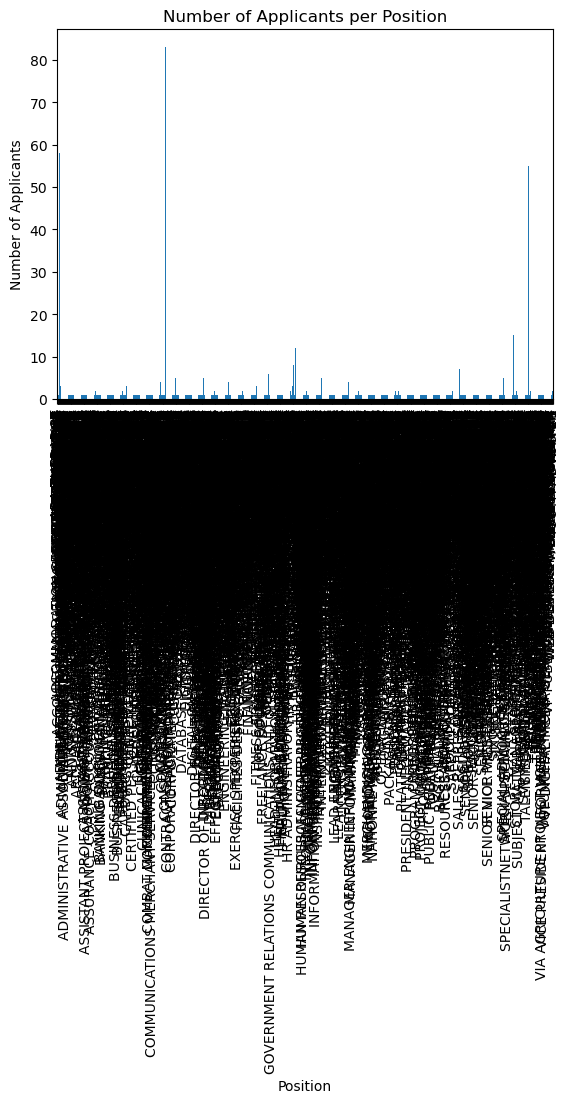

In [24]:
# Count the number of applicants per position
applicant_counts = df.groupby('POSITION_TITLE').size()

# Display the counts
sorted_applicant_counts = applicant_counts.sort_values(ascending=False)
import matplotlib.pyplot as plt

# Plotting the number of applicants per position
applicant_counts.plot(kind='bar')
plt.title('Number of Applicants per Position')
plt.xlabel('Position')
plt.ylabel('Number of Applicants')
plt.show()


The figer is not clear so,

In [25]:
position_counts = df['POSITION_TITLE'].value_counts()
#Filter position titles where counts are greater than 50
popular_positions = position_counts[position_counts > 50]

#Convert to DataFrame for better usability and display
popular_positions_df = popular_positions.reset_index()
popular_positions_df.columns = ['Position Title', 'Count']

# Display the DataFrame
print(popular_positions_df,"\n")

notpopular_positions = position_counts[position_counts ==1]

#Convert to DataFrame for better usability and display
notpopular_positions_df = notpopular_positions.reset_index()
notpopular_positions_df.columns = ['Position Title', 'Count']
print(notpopular_positions_df,"\n")


  Position Title  Count
0     CONSULTANT     83
1     ACCOUNTANT     58
2        TEACHER     55 

                                Position Title  Count
0                     CONSTRUCTION COORDINATOR      1
1                              MANAGER FINANCE      1
2                       CONSTRUCTION INSTALLER      1
3                         CONSTRUCTION FOREMAN      1
4                             ACCOUNT DIRECTOR      1
...                                        ...    ...
1317  AGRICULTURE ADVISOR AND LANGUAGE OFFICER      1
1318                  SENIOR MEDICAL RECRUITER      1
1319                      TEAM MEMBER / PRICER      1
1320    R&D NEW PRODUCT DEVELOPMENT TECHNICIAN      1
1321         PROGRAM DIRECTOR / OFFICE MANAGER      1

[1322 rows x 2 columns] 



Obtaining positions such as Consultant, Accountant, or Teacher is challenging due to the high number of applicants; however, 1,323 individuals will easily secure these jobs
##### **Note: If you want to obtain a job easily or quickly, choose from the 1,323 positions.


####  <span style="color:green">- A concerned parents contacts you to tell them if there is a specific school type that would guaranteed for their child a good future if you can tell, and which is it ?

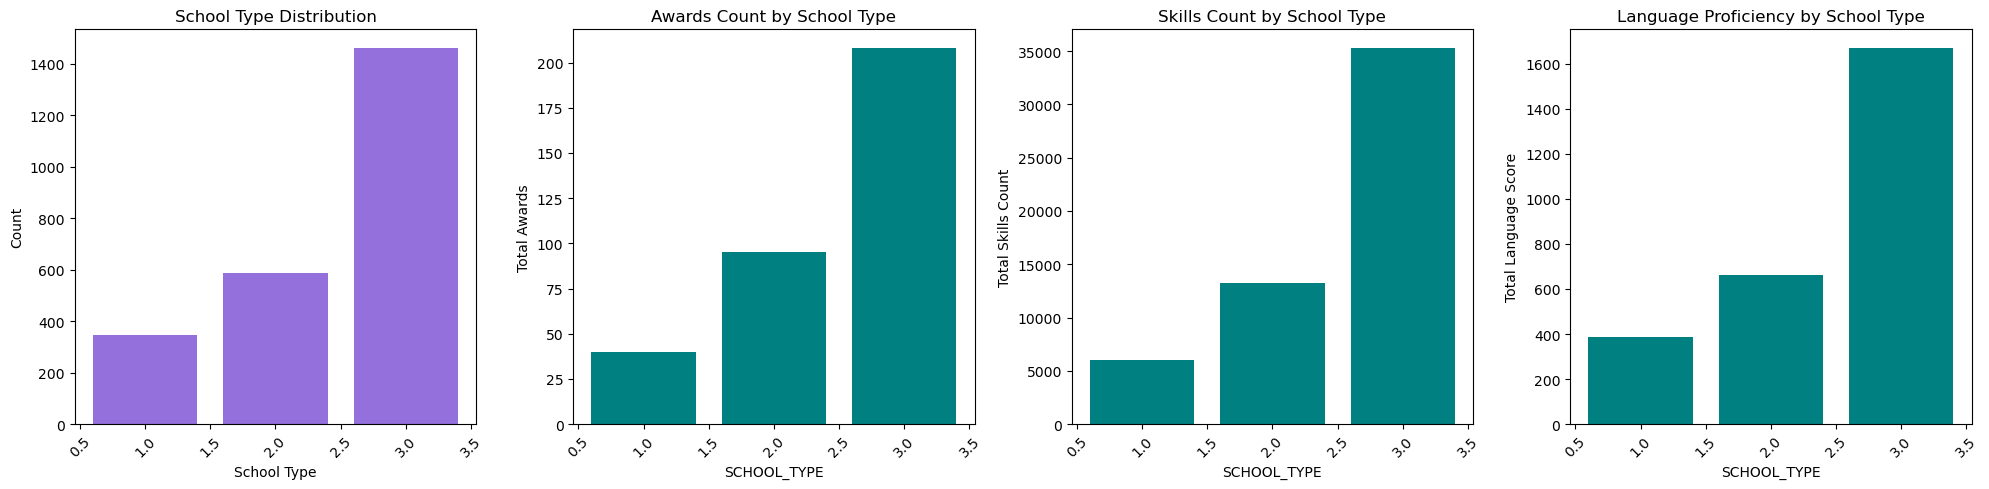

In [26]:

# Setting up the figure and axes for a horizontal layout
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # 1 row, 4 columns

# First plot: School Type Distribution
school_type_counts = df["SCHOOL_TYPE"].value_counts()
school_type_counts = school_type_counts.reindex([1, 2, 3])  # Ensure consistent order
axes[0].bar(school_type_counts.index, school_type_counts, color='#9370DB')
axes[0].set_title('School Type Distribution')
axes[0].set_xlabel('School Type')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Function to plot aggregated data on specified axes
def plot_aggregated_data(ax, df, group_column, value_column, title, ylabel):
    # Aggregate the data
    summary = df.groupby(group_column)[value_column].sum().reset_index()
    summary = summary.sort_values(by=group_column)  # Sorting may be necessary
    ax.bar(summary[group_column], summary[value_column], color='teal')
    ax.set_title(title)
    ax.set_xlabel(group_column)
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='x', rotation=45)

# Second plot: Awards by School Type
plot_aggregated_data(axes[1], df, 'SCHOOL_TYPE', 'AWORDS', 'Awards Count by School Type', 'Total Awards')

# Third plot: Skills Count by School Type
plot_aggregated_data(axes[2], df, 'SCHOOL_TYPE', 'SKILLS_COUNT', 'Skills Count by School Type', 'Total Skills Count')

# Fourth plot: Language by School Type
plot_aggregated_data(axes[3], df, 'SCHOOL_TYPE', 'Language', 'Language Proficiency by School Type', 'Total Language Score')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

Attending university can significantly enhance a child's future prospects. In university, students acquire valuable skills and knowledge, possibly even earning prestigious awards.
University environments often foster a competitive atmosphere, encouraging students to strive for excellence.

####  <span style="color:green">- what is the most common skills among all applications?

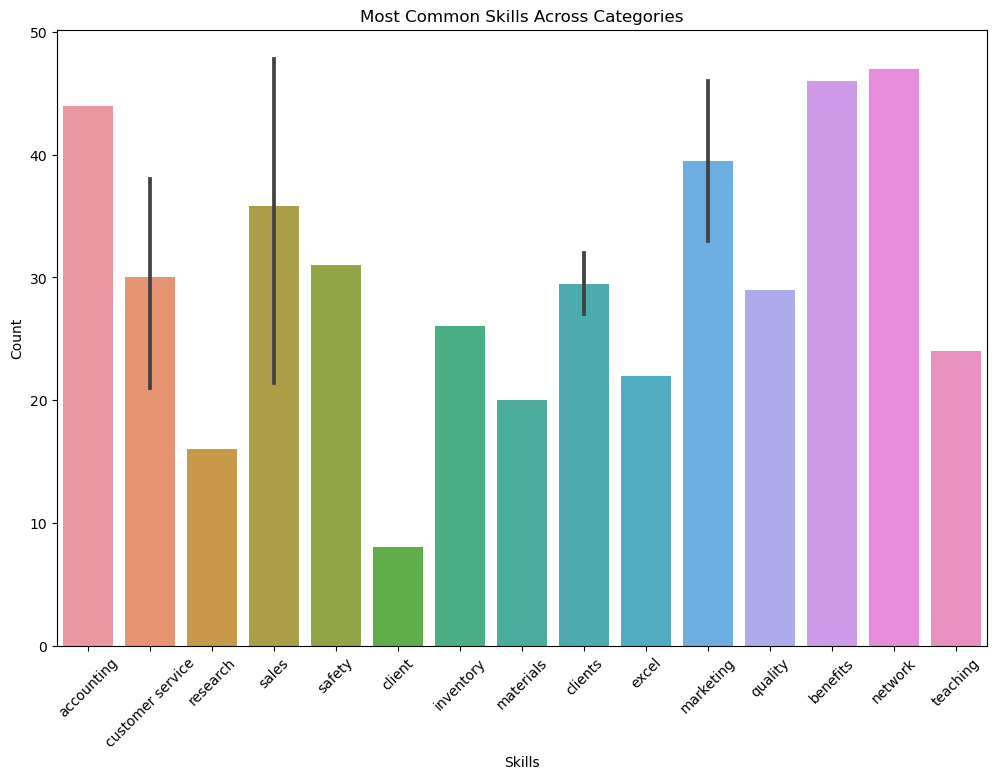

In [27]:

# Convert 'None' to empty sets if any nulls exist for easier manipulation
df['SKILLS'] = df['SKILLS'].apply(lambda x: x if x is not None else set())

def most_common_skills(skills):
    # Flatten the list of sets to a single list
    all_skills = [skill for sublist in skills for skill in sublist]
    # Count the skills and return the two most common along with their counts
    common_skills = Counter(all_skills).most_common(1)
    return {skill: count for skill, count in common_skills}

# Group by 'Category' and apply the function
common_skills_per_category = df.groupby('Category')['SKILLS'].agg(most_common_skills).to_dict()

# Prepare data for visualization
data_for_plotting = []
for category, skills_dict in common_skills_per_category.items():
    for skill, count in skills_dict.items():
        data_for_plotting.append((skill, category, count))

# Convert to DataFrame
plot_df = pd.DataFrame(data_for_plotting, columns=['Skill', 'Category', 'Count'])

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Skill', y='Count', data=plot_df)
plt.title('Most Common Skills Across Categories')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [28]:


# Function to find the most common elements in lists of sets
def most_common_skills(skills):
    # Flatten the list of sets to a single list
    all_skills = [skill for sublist in skills for skill in sublist]
    # Count the skills and return the most common
    if all_skills:
        common_skills = Counter(all_skills).most_common(1)[0][0]
        common_skills_1 = Counter(all_skills).most_common(2)[1][0]

        return {common_skills,common_skills_1}
    else:
        return set()

# Group by 'Categorical' and apply the function
common_skills_per_category = df.groupby('Category')['SKILLS'].agg(most_common_skills).to_dict()
common_skills_per_category

{'ACCOUNTANT': {'accounting', 'excel'},
 'ADVOCATE': {'customer service', 'sales'},
 'AGRICULTURE': {'excel', 'research'},
 'APPAREL': {'inventory', 'sales'},
 'ARTS': {'customer service', 'excel'},
 'AUTOMOBILE': {'customer service', 'sales'},
 'AVIATION': {'excel', 'safety'},
 'BANKING': {'clients', 'sales'},
 'BPO': {'client', 'sales'},
 'BUSINESS-DEVELOPMENT': {'marketing', 'sales'},
 'CHEF': {'inventory', 'quality'},
 'CONSTRUCTION': {'materials', 'safety'},
 'CONSULTANT': {'clients', 'sales'},
 'DESIGNER': {'excel', 'illustrator'},
 'DIGITAL-MEDIA': {'clients', 'marketing'},
 'ENGINEERING': {'autocad', 'quality'},
 'FINANCE': {'accounting', 'financial'},
 'FITNESS': {'customer service', 'sales'},
 'HEALTHCARE': {'client', 'clients'},
 'HR': {'benefits', 'hr'},
 'INFORMATION-TECHNOLOGY': {'hardware', 'network'},
 'PUBLIC-RELATIONS': {'marketing', 'public relations'},
 'SALES': {'customer service', 'sales'},
 'TEACHER': {'progress', 'teaching'}}

Common skills like Excel and marketing are valuable, but acquiring specialized skills can set you apart. Learning unique skills not only enhances your expertise but also boosts your appeal in the job market.

####  <span style="color:green">- Based on the data that you have, could you tell the most active and community helpful applicants are for what position?

In [29]:
# Aggregate data by position and sum up the binary indicators
position_summary = df.groupby('POSITION_TITLE').agg({
    'AWORDS': 'sum',
    'VOLUNTEERING': 'sum',
    'COMMUNITY SERVICE': 'sum'
}).reset_index()

# Create a composite score by summing the binary values
position_summary['Community_Score'] = position_summary['AWORDS'] + position_summary['VOLUNTEERING'] + position_summary['COMMUNITY SERVICE']

# Find the position with the highest community score
top_position = position_summary.loc[position_summary['Community_Score'].idxmax()]

print(f"The most active and community helpful position is {top_position['POSITION_TITLE']}, with a score of {top_position['Community_Score']}.")


The most active and community helpful position is CONSULTANT, with a score of 30.


C:\Users\Aya\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


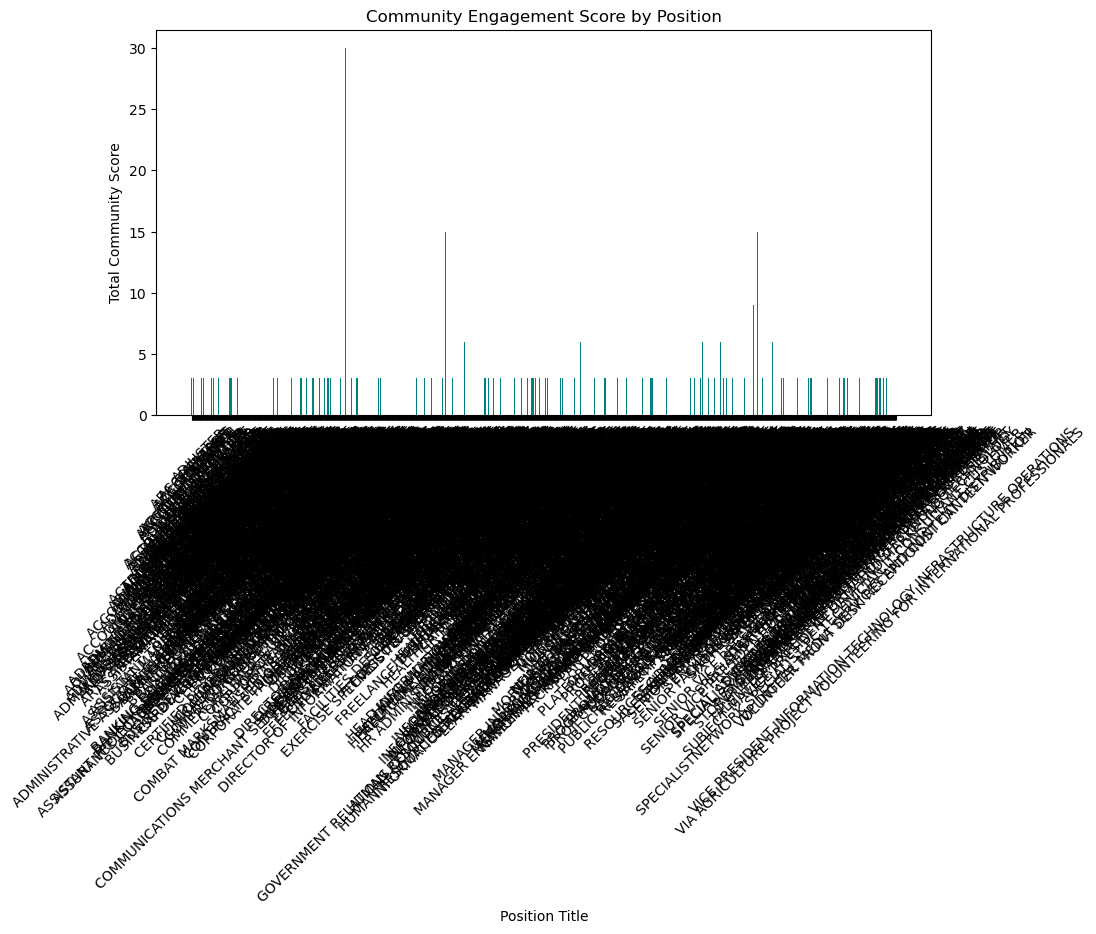

In [30]:
plt.figure(figsize=(10, 5))
plt.bar(position_summary['POSITION_TITLE'], position_summary['Community_Score'], color='teal')
plt.title('Community Engagement Score by Position')
plt.xlabel('Position Title')
plt.ylabel('Total Community Score')
plt.xticks(rotation=45)
plt.show()

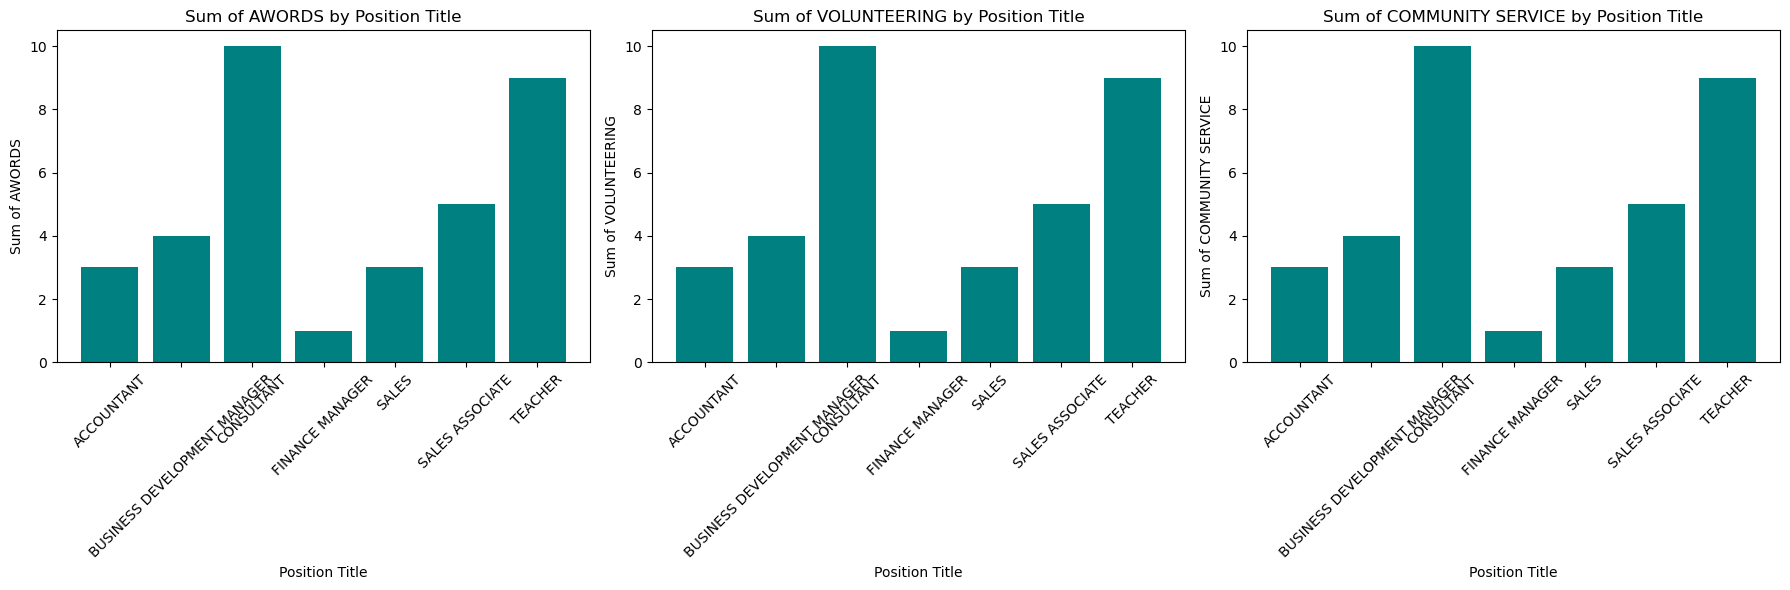

In [31]:
title_counts = df['POSITION_TITLE'].value_counts()
df_filtered = df[df['POSITION_TITLE'].isin(title_counts[title_counts > 20].index)]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Define a function to process and plot data for each column on given axes
def process_and_plot(ax, df, column_name):
    # Aggregate data by position and sum up the binary indicators
    summary = df.groupby('POSITION_TITLE')[column_name].sum().reset_index()

    # Plotting the results on the specified ax
    ax.bar(summary['POSITION_TITLE'], summary[column_name], color='teal')
    ax.set_title(f'Sum of {column_name} by Position Title')
    ax.set_xlabel('Position Title')
    ax.set_ylabel(f'Sum of {column_name}')
    ax.tick_params(axis='x', rotation=45)

    return summary

# Process and plot each column on a different subplot
awards_summary = process_and_plot(axes[0], df_filtered, 'AWORDS')
volunteering_summary = process_and_plot(axes[1], df_filtered, 'VOLUNTEERING')
community_service_summary = process_and_plot(axes[2], df_filtered, 'COMMUNITY SERVICE')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


The most active and community helpful position is CONSALTANT,TEACHER, SALSE ASSOCIATE.

####  <span style="color:green">- could you nominate the best job application for each position?

In [32]:
### Write you code here ###
# Calculate a total score for each candidate
df['QUALIFICATIONS_COUNT'] = df['QUALIFICATIONS'].apply(lambda x: len(x) if x is not None else 0)

df['Total_Score'] = df['EXPERIENCE_LENGTH'] + df['QUALIFICATIONS_COUNT'] + df['SKILLS_COUNT']

# Additional score for volunteering and community service
df['Bonus'] = df['VOLUNTEERING'] + df['COMMUNITY SERVICE']+df['Language']

title_counts = df['POSITION_TITLE'].value_counts()

# Filter out POSITION_TITLEs that appear only once
df_filtered = df[df['POSITION_TITLE'].isin(title_counts[title_counts > 1].index)]

# Sort candidates within each position by Total_Score and Bonus in descending order
df_sorted = df_filtered.sort_values(by=['POSITION_TITLE', 'Total_Score', 'Bonus'], ascending=[True, False, False])

# Select the best candidate for each position
best_candidates = df_sorted.groupby('POSITION_TITLE').first().reset_index()

print(best_candidates[['POSITION_TITLE', 'RESUME_NUMBER', 'Total_Score', 'Bonus']])

               POSITION_TITLE  RESUME_NUMBER  Total_Score  Bonus
0           ACCOUNT EXECUTIVE       39142536         45.0    1.0
1                  ACCOUNTANT       37997506        107.0    1.0
2               ACCOUNTANT II       29050809         46.0    3.0
3              ACCOUNTANT III       14055988         24.0    1.0
4    ADMINISTRATIVE ASSISTANT       20470943         57.0    2.0
..                        ...            ...          ...    ...
199         TEACHER ASSISTANT       25729119         25.0    1.0
200        TECHNICAL DESIGNER       85101052         69.0    1.0
201            VICE PRESIDENT       23015611         69.0    1.0
202           VICTIM ADVOCATE       13967854         30.0    2.0
203           YOGA INSTRUCTOR       17286050         21.0    1.0

[204 rows x 4 columns]


the importance of personal development: You're also highlighting the need for applicants to continuously improve themselves to compete effectively. In scenarios with multiple candidates, individuals must enhance their qualifications, skills, and overall professional profile to stand out as the top choice for a position.

In [33]:
df.drop(['Total_Score', 'Bonus'], axis=1, inplace=True)


####  <span style="color:green">- Do you think learning another language could effect the application, support your opinion.

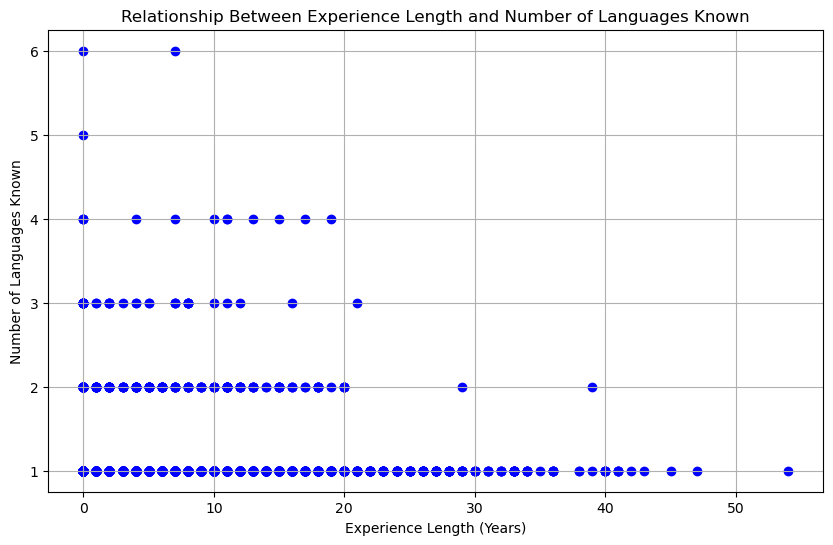

In [34]:
### Write you code here ###
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
plt.scatter(df['EXPERIENCE_LENGTH'], df['Language'], color='blue')  # Plotting the data
plt.title('Relationship Between Experience Length and Number of Languages Known')  # Adding a title
plt.xlabel('Experience Length (Years)')  # X-axis label
plt.ylabel('Number of Languages Known')  # Y-axis label
plt.grid(True)  # Add a grid for easier readability
plt.show()  # Display the plot



I don't think that learning an additional language significantly affects the application process. The data shows that language proficiency does not correlate strongly with the length of experience.

####  <span style="color:green">- Give a full statistical description for all numrical data columns including all insights and needed figures to visualize them.

In [35]:
df.describe()

,RESUME_NUMBER,EDUCATION_TYPE,SCHOOL_TYPE,EXPERIENCE_LENGTH,AWORDS,COMMUNITY SERVICE,VOLUNTEERING,DRIVERS_LICENSE_AVAILABILITY,SKILLS_COUNT,Language,QUALIFICATIONS_COUNT
count,2.394000e+03,1828.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000
mean,3.193408e+07,2.056893,2.466165,7.662072,0.143275,0.143275,0.143275,0.143275,22.767753,1.134503,4.985798
std,2.157722e+07,0.705783,0.733008,8.215740,0.350426,0.350426,0.350426,0.350426,21.034615,0.447256,9.840889
min,3.547447e+06,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.755808e+07,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000
50%,2.521031e+07,2.000000,3.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16.000000,1.000000,0.000000
75%,3.613858e+07,2.000000,3.000000,12.000000,0.000000,0.000000,0.000000,0.000000,34.000000,1.000000,7.000000
max,9.980612e+07,4.000000,3.000000,54.000000,1.000000,1.000000,1.000000,1.000000,191.000000,6.000000,153.000000


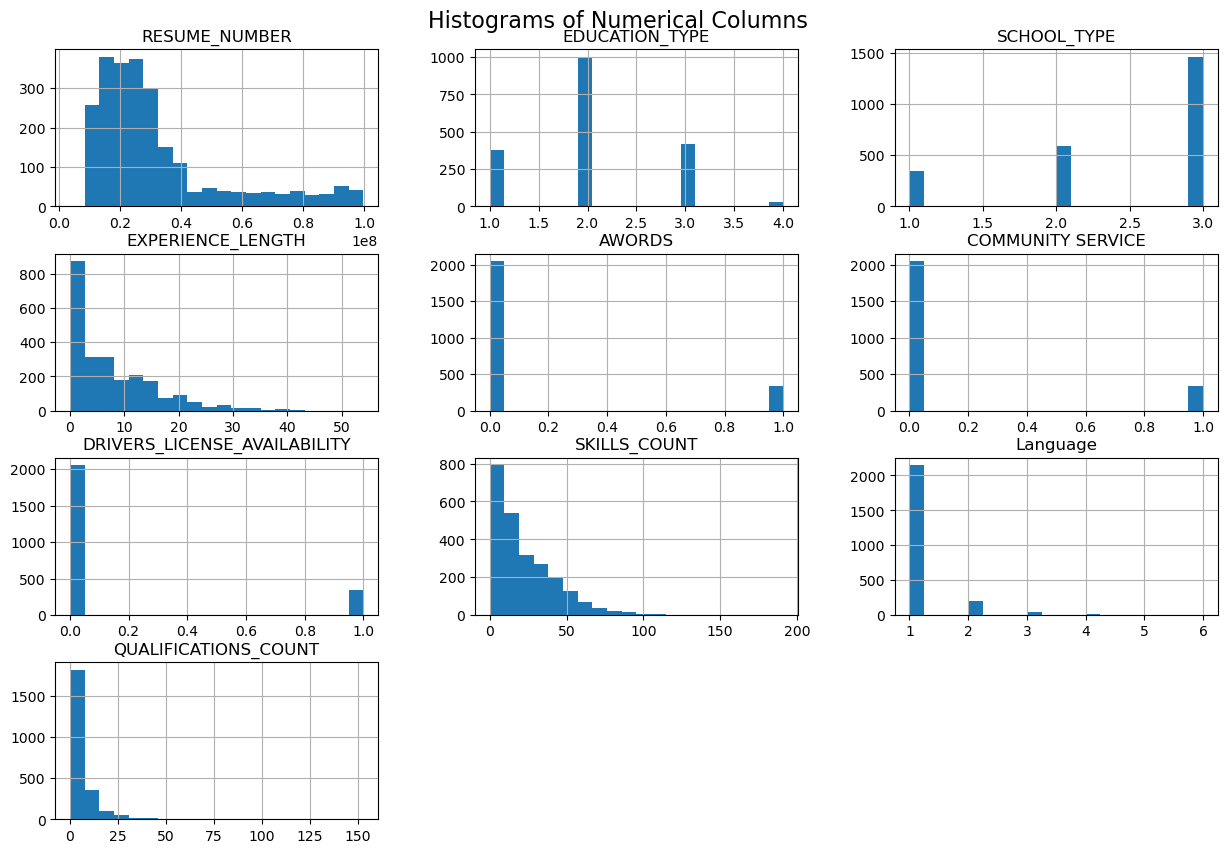

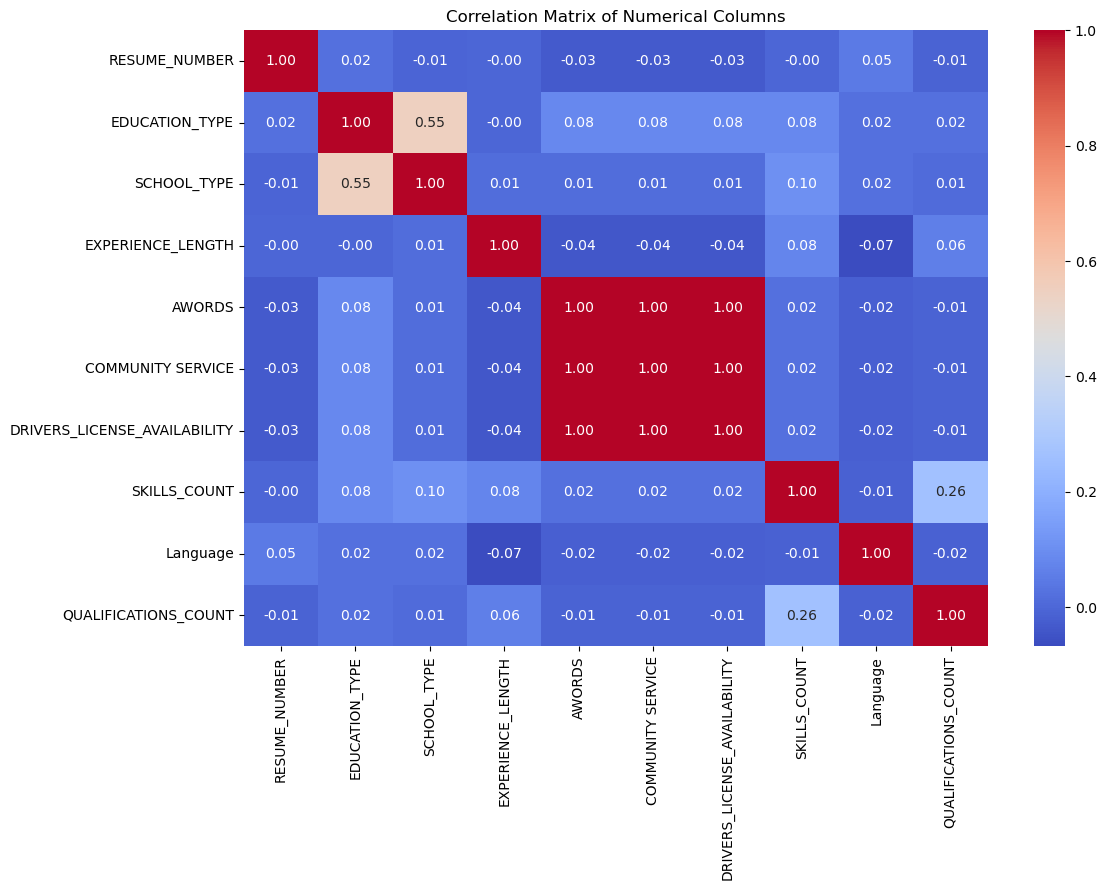

In [36]:
numerical_data = df.select_dtypes(include=['int64', 'float64'])

# Visualize the data distribution using histograms
numerical_data.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Columns', y=0.92, fontsize=16)
plt.show()

# Visualize the correlation matrix using a heatmap
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()



There is a strong correlation between community service, awards, and having a driver's license. Therefore, we will remove two columns to streamline our data analysis.

There are correlation between EDUCATION_TYPE and SCHOOL_TYPE

####  <span style="color:green">- Give a full statistical description for the categorical data columns that can be descriped including all insights and needed figures to visualize them.



In [37]:
df.describe(include=['O'])

,Category,POSITION_TITLE,QUALIFICATIONS,EDUCATION_MAJOR,SKILLS
count,2394,2394,1147,1828,2394
unique,24,1526,1101,775,2280
top,FINANCE,CONSULTANT,[],Appliedcience,"{customer service, sales}"
freq,117,83,16,234,19


The "QUALIFICATIONS" column at the top is marked with an empty set, indicating that it is currently empty or contains no data.
The most frequent skills listed in the data are "sales" and "customer service," appearing 19 times as a set.

#### POSITION_TITLE

C:\Users\Aya\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


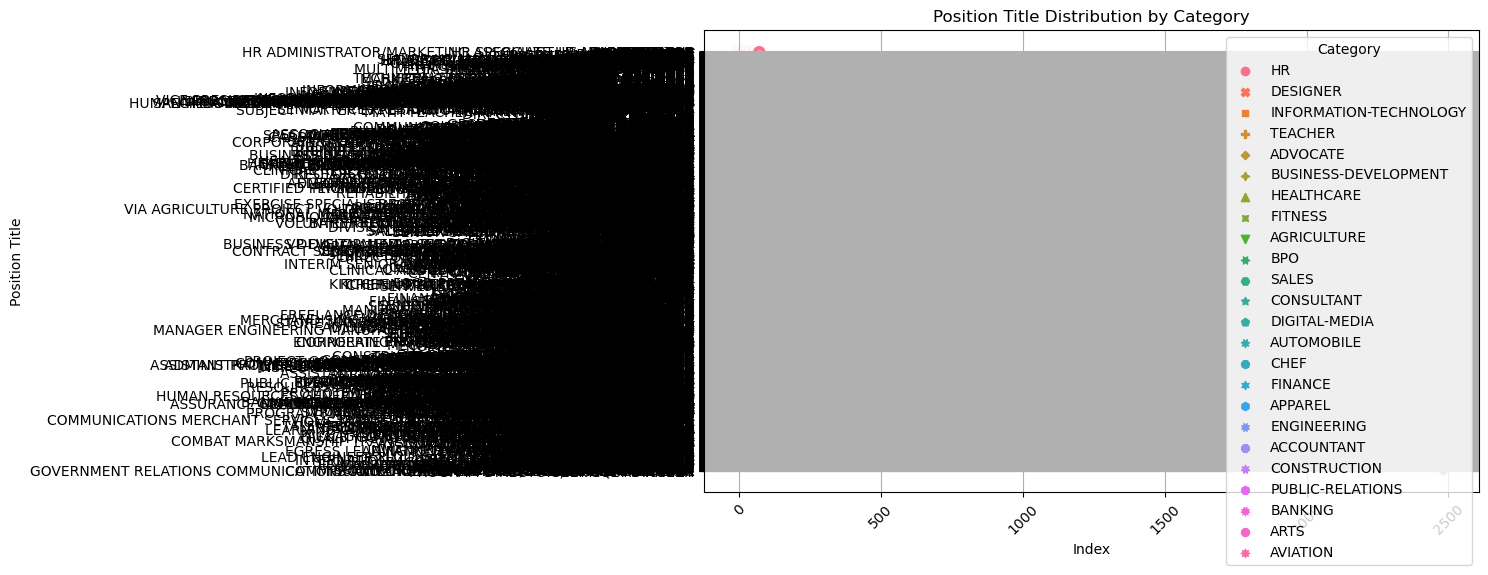

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df['POSITION_TITLE'], hue=df['Category'], style=df['Category'], s=100)

plt.title('Position Title Distribution by Category')
plt.xlabel('Index')
plt.ylabel('Position Title')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Category')
plt.show()

There are many position titles, which could be categorized into broader groups such as Arts, Science, Technology, etc. 
This categorization could help in organizing and analyzing the data more effectively.

#### EDUCATION_MAJOR

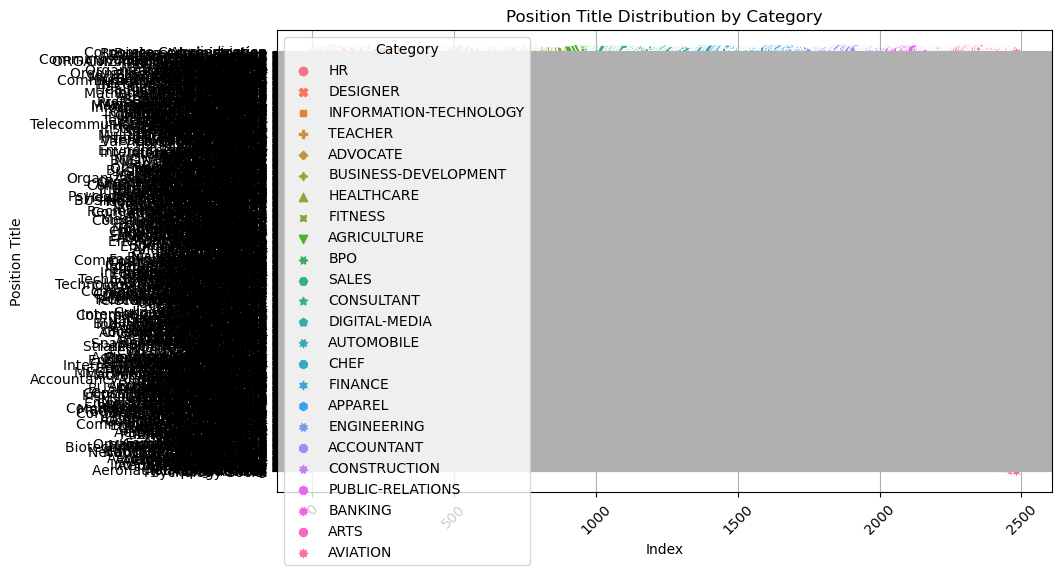

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df['EDUCATION_MAJOR'], hue=df['Category'], style=df['Category'], s=100)

plt.title('Position Title Distribution by Category')
plt.xlabel('Index')
plt.ylabel('Position Title')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Category')
plt.show()

#### SKILLS

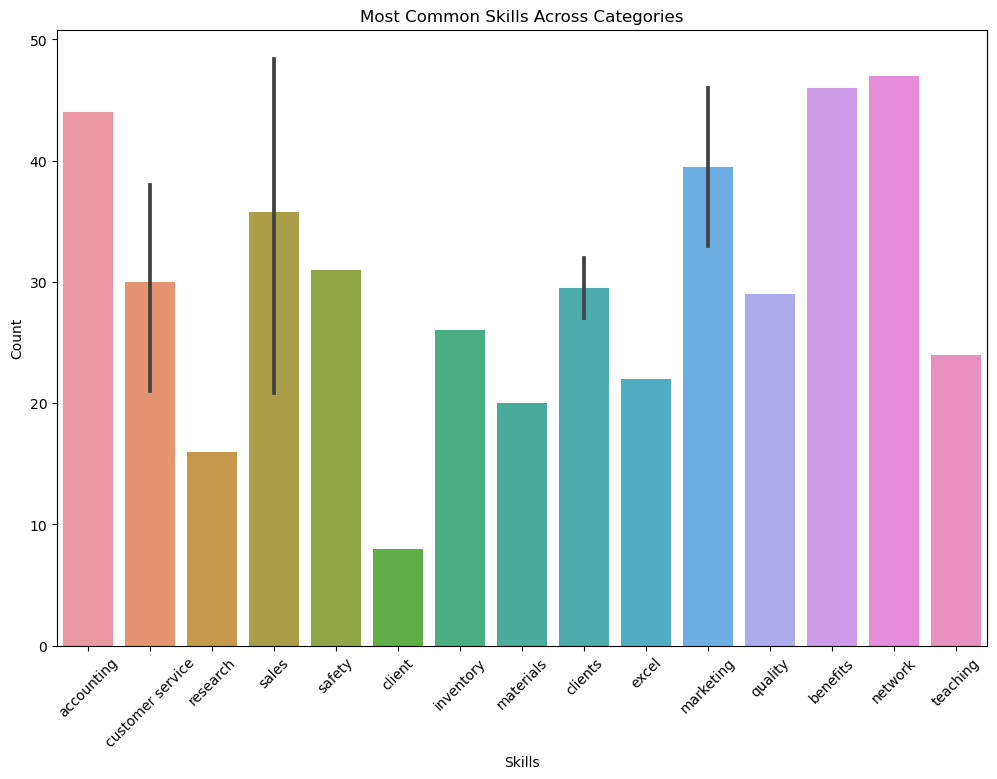

In [40]:

# Convert 'None' to empty sets if any nulls exist for easier manipulation

def most_common_skills(skills):
    # Flatten the list of sets to a single list
    all_skills = [skill for sublist in skills for skill in sublist]
    # Count the skills and return the two most common along with their counts
    common_skills = Counter(all_skills).most_common(1)
    return {skill: count for skill, count in common_skills}

# Group by 'Category' and apply the function
common_skills_per_category = df.groupby('Category')['SKILLS'].agg(most_common_skills).to_dict()

# Prepare data for visualization
data_for_plotting = []
for category, skills_dict in common_skills_per_category.items():
    for skill, count in skills_dict.items():
        data_for_plotting.append((skill, category, count))

# Convert to DataFrame
plot_df = pd.DataFrame(data_for_plotting, columns=['Skill', 'Category', 'Count'])

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Skill', y='Count', data=plot_df)
plt.title('Most Common Skills Across Categories')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### QUALIFICATIONS

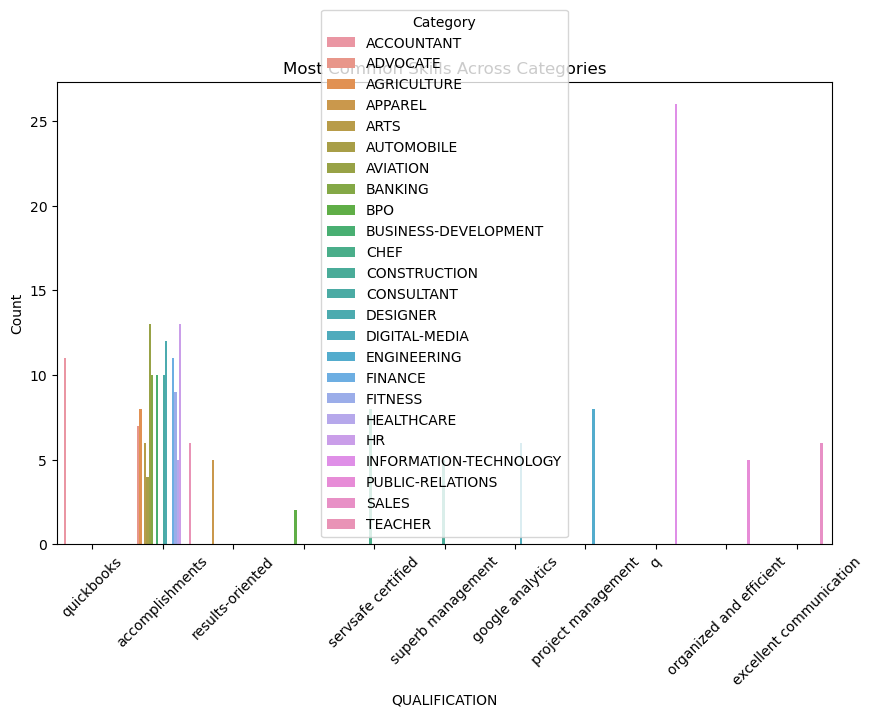

In [41]:
df['QUALIFICATIONS'] = df['QUALIFICATIONS'].apply(lambda x: x if x is not None else set())

def most_common_QUALIFICATIONS(QUALIFICATIONS):
    # Flatten the list of sets to a single list
    all_QUALIFICATIONS = [QUALIFICATION for sublist in QUALIFICATIONS for QUALIFICATION in sublist]
    # Handle the case where there are no skills
    if not all_QUALIFICATIONS:  # This checks if the list is empty
        return {'No QUALIFICATIONS': 0}  # Return a default value
    # Count the skills and return the most common along with their count
    common_QUALIFICATIONS = Counter(all_QUALIFICATIONS).most_common(1)
    return {QUALIFICATION: count for QUALIFICATION, count in common_QUALIFICATIONS}

# Group by 'Category' and apply the function
common_QUALIFICATIONS_per_category = df.groupby('Category')['QUALIFICATIONS'].agg(most_common_QUALIFICATIONS).to_dict()

# Prepare data for visualization
data_for_plotting = []
for category, QUALIFICATIONS_dict in common_QUALIFICATIONS_per_category.items():
    for QUALIFICATION, count in QUALIFICATIONS_dict.items():
        data_for_plotting.append((QUALIFICATION, category, count))

# Convert to DataFrame
plot_df = pd.DataFrame(data_for_plotting, columns=['QUALIFICATION', 'Category', 'Count'])

# Check if DataFrame is empty to avoid plotting errors
if not plot_df.empty:
    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='QUALIFICATION', y='Count', hue='Category', data=plot_df)
    plt.title('Most Common Skills Across Categories')
    plt.xlabel('QUALIFICATION')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


I present the most common qualifications.

In [42]:
selected_columns = df[['POSITION_TITLE', 'RESUME_NUMBER', 'QUALIFICATIONS','EDUCATION_TYPE','SCHOOL_TYPE','EDUCATION_MAJOR','EXPERIENCE_LENGTH'
                       ,'AWORDS','COMMUNITY SERVICE','VOLUNTEERING','DRIVERS_LICENSE_AVAILABILITY','SKILLS_COUNT',
                       'SKILLS','Language','Category']]

selected_columns.to_csv('NEW_RESUME.csv', index=False, header=True)
